Ссылка на соревнование - https://www.kaggle.com/competitions/dl-captcha-new/

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# загрузка данных
images = np.load('images.npy')
labels = np.load('labels.npy')
images_sub = np.load('images_sub.npy')

### Предобработка данных

Посмотрим размерность массивов.

In [5]:
print(f'images shape: {images.shape} \nlabels shape: {labels.shape} \nimages_sub shape: {images_sub.shape}')

images shape: (20000, 48, 48, 3) 
labels shape: (20000,) 
images_sub shape: (50000, 48, 48, 3)


Проведем нормализацию изображений (приведение значений пикселей к диапазону [0, 1]). Далее разделим данные на тренировочную и валидационную выборки и преобразуем метки классов в one-hot encoding (26 классов по числу букв в алфавите).

In [7]:
# нормализация изображений 
images = images.astype('float32') / 255.0
images_sub = images_sub.astype('float32') / 255.0

# разделение данных на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# преобразование меток в one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=26)

### Создание и обучение модели

In [9]:
# создание модели
inputs = Input(shape=(48, 48, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(26, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# структура модели
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,830,810 (6.98 MB)

 Trainable params: 1,828,890 (6.98 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [11]:
# обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.0462 - loss: 3.6326 - val_accuracy: 0.0840 - val_loss: 3.1153
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 154ms/step - accuracy: 0.1061 - loss: 3.0065 - val_accuracy: 0.1558 - val_loss: 2.7535
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 154ms/step - accuracy: 0.2545 - loss: 2.3537 - val_accuracy: 0.5533 - val_loss: 1.4880
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 155ms/step - accuracy: 0.6052 - loss: 1.2077 - val_accuracy: 0.7690 - val_loss: 0.7781
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 154ms/step - accuracy: 0.7868 - loss: 0.6695 - val_accuracy: 0.8002 - val_loss: 0.6437
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 155ms/step - accuracy: 0.8631 - loss: 0.4331 - val_accuracy: 0.8167 - val_loss: 0.5672
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 155ms/step - accuracy: 0.8984 - loss: 0.3157 - val_accuracy: 0.8593 - val_loss: 0.4424
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 78s 155ms/step - accuracy: 0.9305 - loss: 0

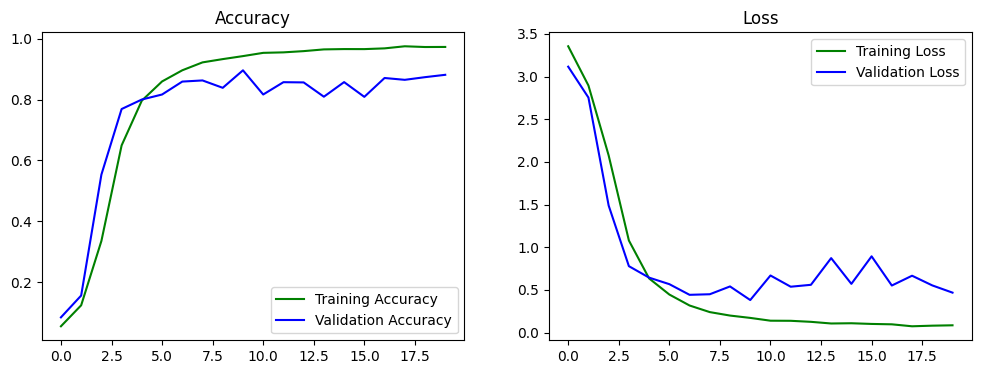

Validation Accuracy: 0.8815


In [13]:
# проверка наличия преобразования one-hot для y_val
if y_val.ndim == 1:
    y_val_encoded = to_categorical(y_val, num_classes=26)
else:
    y_val_encoded = y_val  # если уже выполнено one-hot кодирование

# построение графиков точности и потерь
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='green', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# оценка модели на валидационной выборке
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_acc:.4f}')

### Предсказание на тестовых данных

In [15]:
# предсказание классов для тестовых изображений
predictions = model.predict(images_sub)
predicted_classes = np.argmax(predictions, axis=1)

# создание файла
submission = pd.DataFrame({
    'Id': range(len(predicted_classes)),
    'Category': predicted_classes
})

# сохранение в CSV файл
submission.to_csv('submission7.csv', index=False)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step
